In [224]:
#import libraries and useful tools

import pandas as pd
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.utils import shuffle
import matplotlib.pyplot as plot
import seaborn as sns

In [225]:
# load iris dataset from sklearn and convert to a DataFrame

data = datasets.load_iris()
dataset = pd.DataFrame(data.data, columns = data.feature_names)
dataset['species'] = pd.Categorical.from_codes(data.target, data.target_names)
dataset = shuffle(dataset)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
58,6.6,2.9,4.6,1.3,versicolor
19,5.1,3.8,1.5,0.3,setosa
4,5.0,3.6,1.4,0.2,setosa
118,7.7,2.6,6.9,2.3,virginica
98,5.1,2.5,3.0,1.1,versicolor


In [226]:
# Decide training and resulting features. X is the input, y is the output

X = dataset.drop('species',axis = 1)
y = dataset['species']

In [227]:
# transform species values in numbers

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2,
       2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1,
       1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1])

In [228]:
# divide dataset into training ans testing based on the test_size
# As here 80% of the data is used for training , 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [229]:
# Scale your dataset in standand units

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_tarin)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

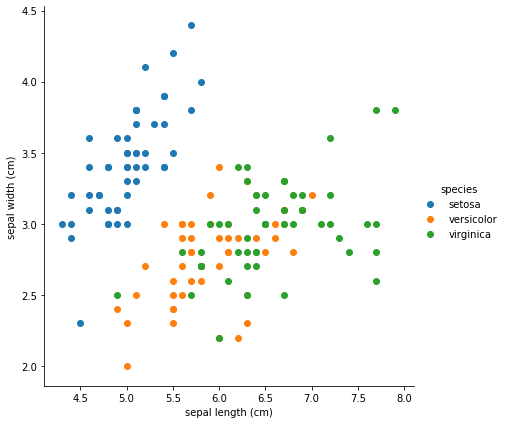

In [230]:
# Show dataset (sepal length vs sepal width)

sns.FacetGrid(dataset,hue='species',height=6).map(plot.scatter, "sepal length (cm)","sepal width (cm)").add_legend()

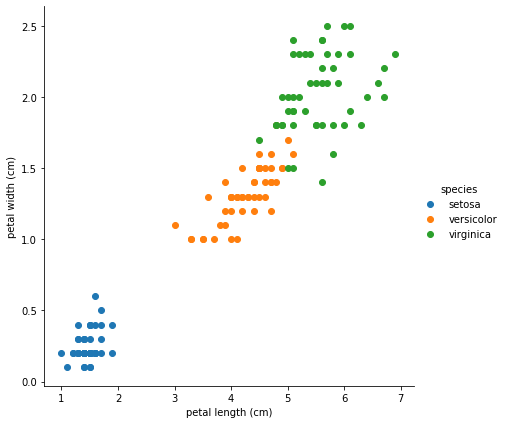

In [231]:
# Show dataset (petal length vs petal width)

sns.FacetGrid(dataset,hue='species',height=6).map(plot.scatter, "petal length (cm)","petal width (cm)").add_legend()

In [232]:
# for values of K from 1 to 20 find the mean square root errors and append in a list

rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    errors = sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append(errors)

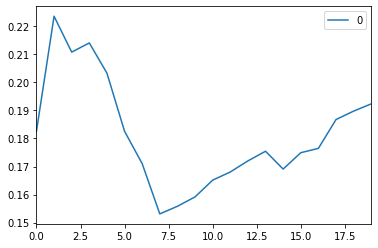

In [233]:
# plot error values

curve = pd.DataFrame(rmse_val)
curve.plot()

In [234]:
# from previous plot , choose the value of K such that sqaure root mean error is minimum
# fit the KNN Classifier with this valus of K and predict values

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [235]:
# Test your results

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
0.9333333333333333


In [236]:
# Inverse transform your test dataset to see the effects of predictions

result_df = pd.DataFrame(scalar.inverse_transform(X_test),columns=data.feature_names)
result_df['species'] = pd.Categorical.from_codes(y_test, data.target_names)
result_df['result-species'] = pd.Categorical.from_codes(y_pred, data.target_names)

In [237]:
# resulted dataframe
result_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,result-species
0,5.8,2.7,3.9,1.2,versicolor,versicolor
1,5.1,3.8,1.6,0.2,setosa,setosa
2,6.7,3.1,4.7,1.5,versicolor,versicolor
3,5.8,4.0,1.2,0.2,setosa,setosa
4,4.7,3.2,1.3,0.2,setosa,setosa


In [238]:
# Values which the model could not classify correctly due to intense similar data.

result_df[result_df['species']!=result_df['result-species']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,result-species
21,6.0,3.0,4.8,1.8,virginica,versicolor
24,6.0,2.2,5.0,1.5,virginica,versicolor
